In [49]:
import numpy as np
import skimage.io
import skimage.viewer 
import matplotlib.pyplot as plt
import ipympl
from PIL import Image
from scipy import ndimage as ndi

### Read Image

In [50]:
%matplotlib inline
img = skimage.io.imread(fname="MyPic.jpeg")

### Image in gray colors

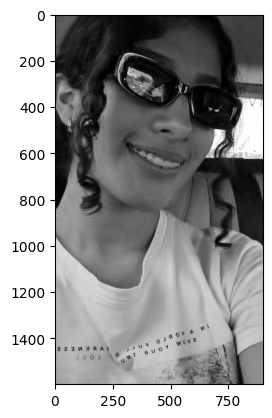

In [51]:
image = img[:,:,1]
w, h = image.shape
plt.imshow(image, cmap="gray")

### Create Identity Matrix

In [52]:
mat_identity = np.array([[1,0,0],[0,1,0],[0,0,1]])
image1 = ndi.affine_transform(image, mat_identity) # apply affine transformation to the identity matrix

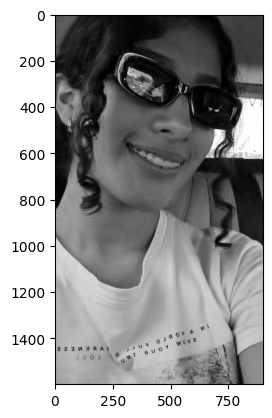

In [53]:
%matplotlib inline
plt.imshow(image1, cmap="gray") # original imagen with original identity matrix.

### Scale

In [54]:
def scale(img, s_x, s_y):
    mat_scale = np.array([[s_x,0,0],[0,s_y,0],[0,0,1]]) #scale image matrix in x and y.
    return ndi.affine_transform(img, mat_scale) # apply affine transformation to it.

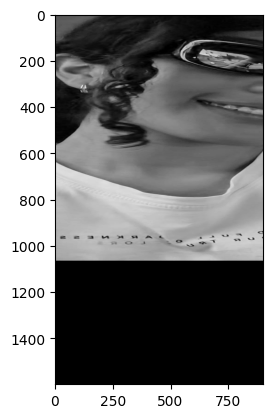

In [55]:
%matplotlib inline
plt.imshow(scale(image, 1.5,0.5), cmap="gray")

### Move

In [72]:
def move(img, t_x, t_y):
    mat_scale = np.array([[1,0,t_y],[0,1,-t_x],[0,0,1]]) #scale image matrix in x and y.
    return ndi.affine_transform(img, mat_scale) # apply affine transformation to it.

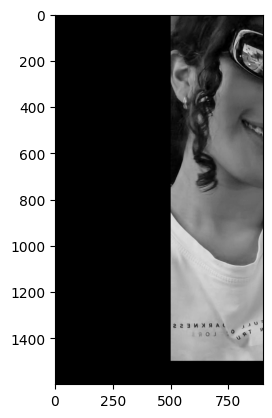

In [57]:
%matplotlib inline
plt.imshow(move(image, 500,100), cmap="gray")

### Reflect

In [58]:
def reflect(img, axis = 0): #Axis: 0 - y; 1 - x
    if axis == 0: mat_reflect = np.array([[1,0,0],[0,-1,0],[0,0,1]]) @ np.array([[1,0,0],[0,1,-h],[0,0,1]]) 
    else: mat_reflect = np.array([[-1,0,0],[0,1,0],[0,0,1]]) @ np.array([[1,0,-w],[0,1,0],[0,0,1]]) 
    return ndi.affine_transform(img, mat_reflect) # offset=(0,h)

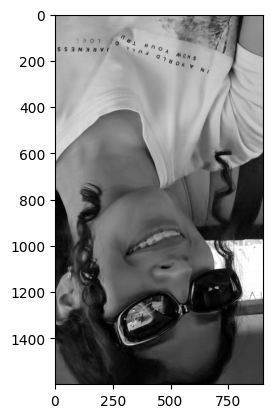

In [59]:
%matplotlib inline
plt.imshow(reflect(image, 1), cmap="gray")

### Rotate
##### Theta is the one who manages how much we want to rotate our image

In [60]:
def rotate(myimg, theta):
    mat_rotate = np.array([[1,0,w/2],[0,1,h/2],[0,0,1]]) @ np.array([[np.cos(theta),np.sin(theta),0],[np.sin(theta),-np.cos(theta),0],[0,0,1]]) @ np.array([[1,0,-w/2],[0,1,-h/2],[0,0,1]])
    return ndi.affine_transform(myimg, mat_rotate)

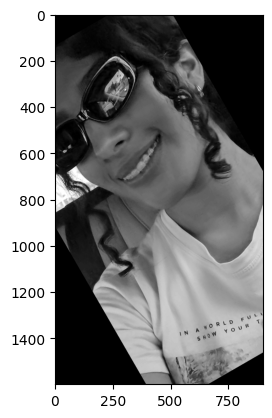

In [61]:
%matplotlib inline
plt.imshow(rotate(image, np.pi/6), cmap="gray")

### Shear
##### Lambda tells us how much we want to shear our image

In [62]:
def shear(myimg, lambda1):
    mat_shear = np.array([[1,lambda1,0],[lambda1,1,0],[0,0,1]]) # identity matrix with lambda modifier.
    return ndi.affine_transform(myimg, mat_shear)

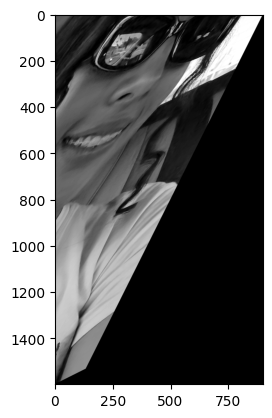

In [63]:
%matplotlib inline
plt.imshow(shear(image, 0.5), cmap="gray")

### Warp
##### We select our points of interest and projection matrix and apply the transform.warp function from skimage.

    estimate_transform(ttype, src, dst)
        - ttype: 
         {‘euclidean’,similarity’,‘affine’,‘piecewise-affine’,‘projective’,‘polynomial’}
        - src: points of interest
        - dst: projection

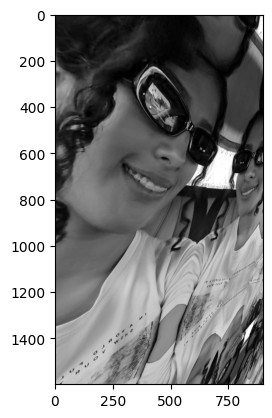

In [64]:
from skimage import transform

def warp(myimg, points_of_interest, proyection):
    tform = transform.estimate_transform('projective', points_of_interest, projection)
    return transform.warp(myimg, tform.inverse, mode = 'symmetric')


%matplotlib inline
points_of_interest = np.array([[360, 110], 
                               [420, 270], 
                               [130, 400], 
                               [100, 280]])

projection = np.array([[500, 200],
                       [500, 390],
                       [100, 390],
                       [100, 200]])
plt.imshow(warp(image, points_of_interest, projection), cmap="gray")

### Several modifications

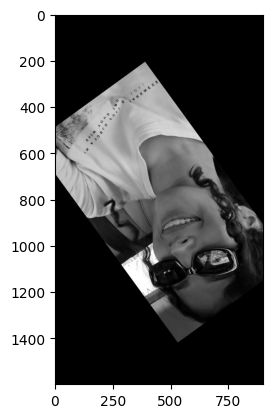

In [81]:
%matplotlib inline
img = scale(image, 1.5, 1.5)
img = reflect(img, 1)
img = move(img, 150, 250)
img = rotate(img, np.pi/5)
plt.imshow(img, cmap="gray")